<img src="../../../images/banners/ml-algorithms.jpg" width="600"/>

<a class="anchor" id="intro_to_data_structures"></a>
# <img src="../../../images/logos/ml-logo.png" width="23"/> Machine Learning Algorithms

## <img src="../../../images/logos/toc.png" width="20"/> Table of Contents 
* [](#)

---

We turn now to a discussion of supervised learning, starting with regression. The goal of regression is to predict the value of one or more continuous target variables $t$ given the value of a D-dimensional vector $x$ of input variables.

Given a training data set comprising $N$ observations ${x_n}$, where $n = 1, ... , N$,
together with corresponding target values ${t_n}$, the goal is to predict the value of $t$ for a new value of $x$. In the simplest approach, this can be done by directly constructing an appropriate function $y(x)$ whose values for new inputs $x$ constitute the predictions for the corresponding values of $t$.

More generally, from a probabilistic perspective, we aim to model the predictive distribution $p(t|x)$ because this expresses our uncertainty about the value of $t$ for each value of $x$. From this conditional distribution we can make predictions of $t$, for any new value of $x$, in such a way as to minimize the expected value of a suitably chosen loss function. A common choice of loss function for real-valued variables is the squared loss, for which the optimal solution is given by the conditional expectation of $t$.

Although linear models have significant limitations as practical techniques for
pattern recognition, particularly for problems involving input spaces of high dimensionality, they have nice analytical properties and form the foundation for more sophisticated models to be discussed in later sections.

<img src="../images/linear-nonlinear.png" width="500"/>

## Linear Models

The simplest linear model for regression is one that involves a linear combination of the input variables:

\begin{equation}
y(x,w) = w_0 + w_1x_1 + \cdots + w_Dx_D
\end{equation}

where $x = (x_1, \cdots , x_D)^T$. This is often simply known as linear regression. The key property of this model is that it is a linear function of the parameters $w_0, \cdots , w_D$. It is also, however, a linear function of the input variables $x_i$, and this imposes significant limitations on the model. We therefore extend the class of models by considering linear combinations of fixed nonlinear functions of the input variables, of the form:

\begin{equation}
y(x,w) = w_0 + \frac{1}{M} \sum_{j=1}^{M} w_j X_j(x)
\end{equation}

By denoting the maximum value of the index j by M − 1, the total number of parameters in this model will be M.

The parameter $w_0$ allows for any fixed offset in the data and is sometimes called a bias parameter (not to be confused with ‘bias’ in a statistical sense).

It is often convenient to define an additional dummy feature $X_0 = 1$ so that

\begin{equation}
y(x,w) = \sum_{j=0}^{M-1} w_j X_j = w^T X(x)
\end{equation}

where $w = (w_0, \cdots, w_{M-1})^T$ and $X = (X_0, \cdots, X_{M-1})^T$.

<img src="../images/linear-model-formula.webp" width="200"/>

## What is Maximum Likelihood?

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.

Note that maximum likelihood is not probability. Probability corresponds to finding the chance of something given a sample distribution of the data, while on the other hand, Likelihood refers to finding the best distribution of the data given a particular value of some feature or some situation in the data. While probability is used to find the chance of occurrence of a particular situation, likelihood is used to generally maximizing the chances of a particular situation to occur. To learn more, watch:

- <img src="../../../images/logos/youtube.png" width="15"/> [Probability is not Likelihood](https://www.youtube.com/watch?v=pYxNSUDSFH4&t=1s)

## Maximum likelihood and Least Squares Problem

We begin by introducing a simple regression problem. Suppose
we observe a real-valued input variable $x$ and we wish to use this observation to predict the value of a real-valued target variable $t$. For the present purposes, it is instructive
to consider an artificial example using synthetically generated data because we then know the precise process that generated the data for comparison against any learned model.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array(sorted(np.random.rand(10)))

In [33]:
np.random.rand()

0.4797210159295514

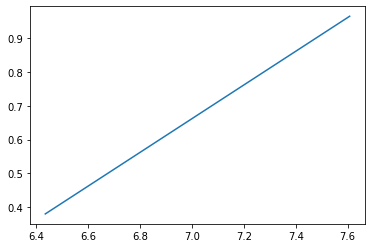

In [34]:
y = 2*x + 3 + np.random.rand() * 10
plt.plot(y, x)

Given a data set $D = \{(x_i, y_i)\}_{i=1}^n$ the objective is to learn the relationship between features and the target such as:

\begin{equation}
f(x) = w_0 + w_1x_1 + w_2x_2
\end{equation}

where $w = (w0,w1,w2)$ is a set of parameters that need to be determined (learned) and $x = (x_1, x_2)$.

Finding the best parameters $w$ is then referred to as linear regression problem, whereas all other types of relationship between the features and the target fall into a category of non-linear regression. In either situation, the regression problem can be presented as a probabilistic modeling approach that reduces to parameter estimation: to an optimization problem with the goal of maximizing or minimizing some performance criterion between target values $\{y_i\}{i=1}^{n}$ and predictions $\{f(x_i)\}{i=1}^{n}$. We can think of a particular optimization algorithm as the _learning_ or _training algorithm_.

We assume that the target variable $t$ is given by a deterministic function $y(x,w)$ with additive Gaussian noise so that

\begin{equation}
t = y(x,w) +  \epsilon
\end{equation}

## Linear Basis Function Models

The simplest form of linear regression models are also linear functions of the input variables. However, we can obtain a much more useful class of functions by taking linear combinations of a fixed set of nonlinear functions of the input variables, known as basis functions.

 In many practical applications of pattern recognition, we will apply some form of fixed pre-processing or feature extraction, to the original data variables. If the original variables comprise the vector $x$, then the features can be expressed in terms of the basis functions ${\phi_j(x)}$.

By using nonlinear basis functions, we allow the function $y(x,w)$ to be a nonlinear
function of the input vector $x$. Functions of the form $y(x,w) = w_0 + \frac{1}{M} \sum_{j=1}^{M} w_j X_j$ are called linear models, however, because this function is linear in w. It is this linearity in the parameters that will greatly simplify the analysis of this class of models. However, it also leads to some significant limitations, as we discuss later.

If the original variables comprise the vector $x$, then the features can be expressed in terms of the basis functions ${\phi_j(x)}$.